In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from BSDE_Solver import BSDE_Solver
from Runge_Kutta_Solver import Runge_Kutta_Solver
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Remove warnings

In [10]:
n = 20
# Set parameters
parameters = {
    "Q": tf.constant([[0.1, 0.2], [0.2, 0.1]]),
    'R': tf.constant([[0.1, 0.2], [0.2, 0.1]]),
    'S': tf.constant([[0.0, 0.0], [0.0, 0.0]]),
    'A': tf.constant([[0.0, 0.1], [0.1, 0.0]]),
    'B': tf.constant([[0.3, 0.0], [0.0, 0.3]]),
    'C': tf.constant([[0.1, 0.2], [0.2, 0.1]]),
    'D': tf.constant([[0.2, 1.0], [1.0, 0.2]]),
    'G': -tf.constant([[0.3, 0.1], [0.1, 0.3]]),
    'L': -tf.constant([[0.1], [0.1]]),
    'N': n,
    'batch_size': 1024,
    'iteration_steps': 100,
    'x_0': tf.Variable([[1.4], [1.2]]),
    'lr_gamma': 1e-1,
    'lr_pi': 1e-2
}

parameters_RK = {
    "Q": np.array([[0.1, 0.2], [0.2, 0.1]]),
    'R': np.array([[0.1, 0.2], [0.2, 0.1]]),
    'S': np.array([[0.0, 0.0], [0.0, 0.0]]),
    'A': np.array([[0.0, 0.1], [0.1, 0.0]]),
    'B': np.array([[0.3, 0.0], [0.0, 0.3]]),
    'C': np.array([[0.1, 0.2], [0.2, 0.1]]),
    'D': np.array([[0.2, 0.1], [0.1, 0.2]]),
    'G': np.array([[0.3, 0.1], [0.1, 0.3]]),
    'L': np.array([[0.1], [0.1]]),
    'N': n,
}

In [11]:
# Define solver with the parameters
bsde_solver = BSDE_Solver(parameters)
ode_solver = Runge_Kutta_Solver(parameters_RK)

In [12]:
bsde_solver.train(display_steps=True)

Training in progress
--------------------------------------------------
Iteration step 10, time: 0.8533 minutes
Iteration step 20, time: 1.7100 minutes
Iteration step 30, time: 2.5579 minutes
Iteration step 40, time: 3.4021 minutes
Iteration step 50, time: 4.2471 minutes
Iteration step 60, time: 5.1147 minutes
Iteration step 70, time: 5.9756 minutes
Iteration step 80, time: 6.8176 minutes
Iteration step 90, time: 7.6755 minutes
Iteration step 100, time: 8.6508 minutes
Training finished


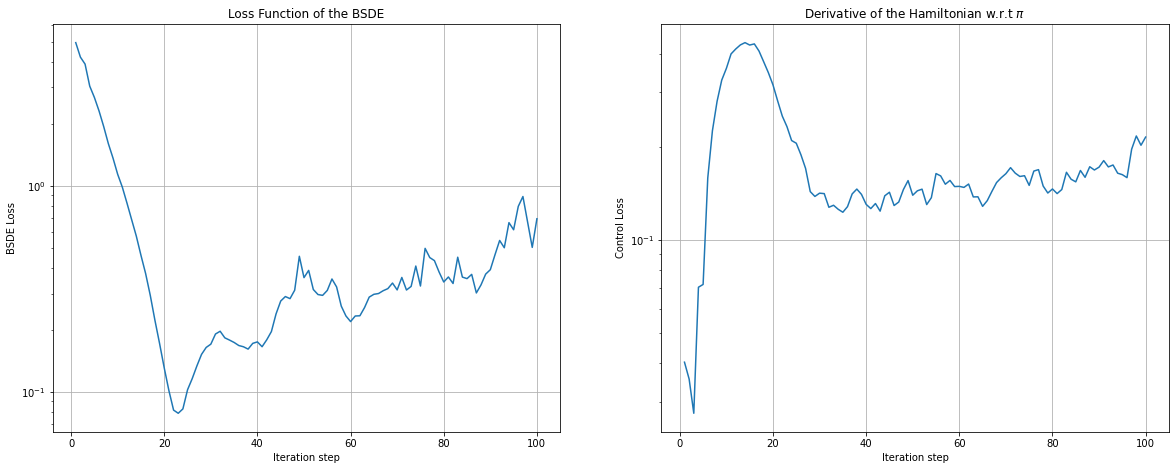

In [13]:
bsde_solver.plot("losses")

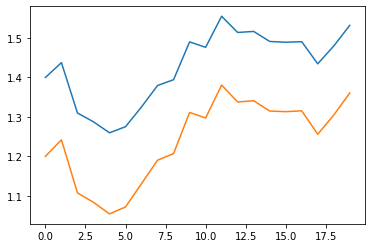

In [16]:
plt.plot(X[: -1, 0, 0])
plt.plot(X[: -1, 1, 0])
plt.show()

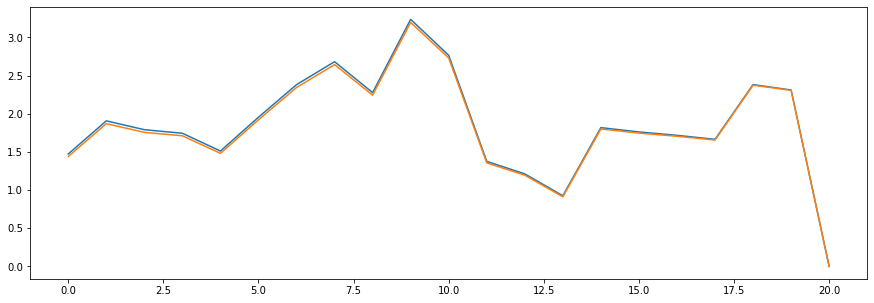

In [21]:
X, V_bsde, Z = bsde_solver.simulate()

V_primal_RK = ode_solver.compute_V_primal(X)
V_primal_from_dual = ode_solver.compute_V_primal_from_dual(X)

plt.figure(figsize=(15, 5))
plt.plot(-V_primal_RK)
plt.plot(-V_primal_from_dual)
plt.show()

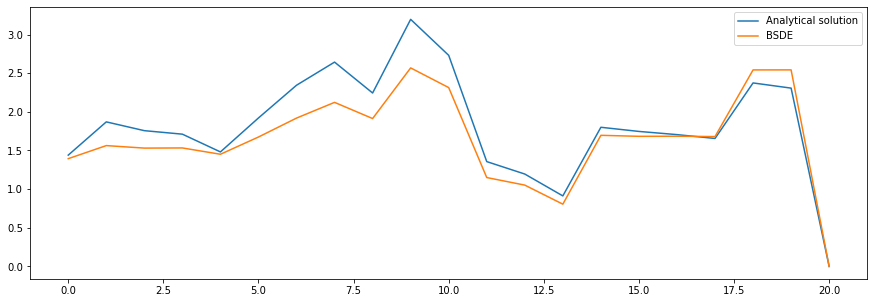

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(-V_primal_from_dual, label="Analytical solution")

plt.plot(V_bsde, label="BSDE")
plt.legend()
plt.show()